In [1]:
import numpy as np
import pandas as pd 
import sqlite3

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
path_airlines = "../../data/airlines-dataset/"  
database_airlines = path_airlines + 'travel.sqlite'

### 1. ¿ Cuántas tablas tiene la base de datos?

In [4]:
conn = sqlite3.connect(database_airlines)

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,aircrafts_data,aircrafts_data,2,CREATE TABLE aircrafts_data (\r\n aircraft_...
1,table,airports_data,airports_data,3,CREATE TABLE airports_data (\r\n airport_co...
2,table,boarding_passes,boarding_passes,4,CREATE TABLE boarding_passes (\r\n ticket_n...
3,table,bookings,bookings,5,CREATE TABLE bookings (\r\n book_ref charac...
4,table,flights,flights,6,CREATE TABLE flights (\r\n flight_id intege...
5,table,seats,seats,7,CREATE TABLE seats (\r\n aircraft_code char...
6,table,ticket_flights,ticket_flights,8,CREATE TABLE ticket_flights (\r\n ticket_no...
7,table,tickets,tickets,9,CREATE TABLE tickets (\r\n ticket_no charac...


In [5]:
len(tables)

8

### 2. ¿Qué información hay en cada tabla?

In [6]:
for i in tables['name']:

    info = pd.read_sql("""SELECT * FROM %s LIMIT 1;"""%i, conn)
    display(info)

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100


,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk


,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D


,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700


,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N


,aircraft_code,seat_no,fare_conditions
0,319,2A,Business


,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100


,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011


## II. Para el dataset de aviones responder:

### ¿En el dataset de aviones: que tipos de asientos y tiquetes hay?

In [7]:
seats_type = pd.read_sql("""SELECT DISTINCT fare_conditions FROM seats;""", conn)

seats_type

,fare_conditions
0,Business
1,Economy
2,Comfort


In [8]:
tickets_type = pd.read_sql("""SELECT DISTINCT fare_conditions FROM ticket_flights;""", conn)

tickets_type

,fare_conditions
0,Business
1,Comfort
2,Economy


### 2.	¿Qué modelos de aviones hay?

In [9]:
airplane_models = pd.read_sql("""SELECT DISTINCT model FROM aircrafts_data;""", conn)

airplane_models

,model
0,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}"
1,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}"
2,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп..."
3,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-..."
4,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-..."
5,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-..."
6,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}"
7,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208..."
8,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ..."


### 3.	¿Cuántas reservas hay?

In [10]:
booking = pd.read_sql("""SELECT COUNT(*) FROM bookings;""", conn)

booking

,COUNT(*)
0,262788


### 4.	¿Cuál es el precio medio de las reservas? ¿el más caro? ¿El más barato?

In [11]:
booking = pd.read_sql("""SELECT AVG(total_amount) AS 'Average bookings', MAX(total_amount) AS 'More expensive booking', MIN(total_amount) AS 'Cheaper booking'  FROM bookings;""", conn)

booking

,Average bookings,More expensive booking,Cheaper booking
0,79025.605812,1204500,3400


### 5.	¿Qué rangos de aeronaves hay? (ordenarlos descendentemente) 

In [12]:
ranges = pd.read_sql(""" SELECT range FROM aircrafts_data ORDER BY range DESC""", conn)

ranges

,range
0,11100
1,7900
2,6700
3,5700
4,5600
5,4200
6,3000
7,2700
8,1200


## iii. Para el dataset de fútbol responder: 

In [13]:
path_soccer = "./soccer/"  
database_soccer = path_soccer + 'database.sqlite'

In [14]:
conn = sqlite3.connect(database_soccer)

tables_soccer = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables_soccer

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


### 6.	¿Cuántos jugadores hay en la base de datos?

In [15]:
players = pd.read_sql("""SELECT COUNT(DISTINCT id) FROM Player ;""", conn)

players

,COUNT(DISTINCT id)
0,11060


### 7.	¿Cuáles son los 10 primeros jugadores en la tabla player?


In [16]:
top10_table = pd.read_sql("""SELECT * FROM Player LIMIT 10 ;""", conn)

top10_table

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
5,6,27316,Aaron Hunt,158138,1986-09-04 00:00:00,182.88,161
6,7,564793,Aaron Kuhl,221280,1996-01-30 00:00:00,172.72,146
7,8,30895,Aaron Lennon,152747,1987-04-16 00:00:00,165.10,139
8,9,528212,Aaron Lennox,206592,1993-02-19 00:00:00,190.50,181
9,10,101042,Aaron Meijers,188621,1987-10-28 00:00:00,175.26,170


### 8.	¿Cuántos países hay? ¿Cuántos jugadores hay en cada país?


In [17]:
countries = pd.read_sql("""SELECT * FROM Country ;""", conn)

countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [18]:
for i in tables_soccer['name']:

    info = pd.read_sql("""SELECT * FROM %s LIMIT 1;"""%i, conn)
    print(i)
    display(info)

sqlite_sequence


,name,seq
0,Team,103916


Player_Attributes


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67,71,right,medium,medium,49,44,71,61,44,51,45,39,64,49,60,64,59,47,65,55,58,54,76,35,71,70,45,54,48,65,69,69,6,11,10,8,8


Player


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


Match


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1.73,3.4,5,1.75,3.35,4.2,1.85,3.2,3.5,1.8,3.3,3.75,None,None,None,1.7,3.3,4.33,1.9,3.3,4,1.65,3.4,4.5,1.78,3.25,4,1.73,3.4,4.2


League


,id,country_id,name
0,1,1,Belgium Jupiler League


Country


,id,name
0,1,Belgium


Team


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673,KRC Genk,GEN


Team_Attributes


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,None,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover


### 9.	¿Cuántas ligas hay?


In [19]:
Leagues = pd.read_sql("""SELECT DISTINCT(name) FROM League ;""", conn)

Leagues

,name
0,Belgium Jupiler League
1,England Premier League
2,France Ligue 1
3,Germany 1. Bundesliga
4,Italy Serie A
5,Netherlands Eredivisie
6,Poland Ekstraklasa
7,Portugal Liga ZON Sagres
8,Scotland Premier League
9,Spain LIGA BBVA


In [20]:
Leagues = pd.read_sql("""SELECT * FROM League ;""", conn)

Leagues

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


### 10. ¿Cuántas ligas hay por país?


In [21]:
Leagues_by_country = pd.read_sql("""SELECT country_id, COUNT(name) FROM League GROUP BY country_id;""", conn)

Leagues_by_country

,country_id,COUNT(name)
0,1,1
1,1729,1
2,4769,1
3,7809,1
4,10257,1
5,13274,1
6,15722,1
7,17642,1
8,19694,1
9,21518,1


In [22]:
Leagues_by_country = pd.read_sql("""SELECT COUNTRY.name AS country_name, COUNT(League.name) AS league_count
FROM COUNTRY
INNER JOIN League ON COUNTRY.id = League.country_id GROUP BY COUNTRY.name; """, conn)

Leagues_by_country

,country_name,league_count
0,Belgium,1
1,England,1
2,France,1
3,Germany,1
4,Italy,1
5,Netherlands,1
6,Poland,1
7,Portugal,1
8,Scotland,1
9,Spain,1


In [23]:
leages_by_season = pd.read_sql("""SELECT Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal) AS avg_home_team_scors, 
                                        avg(away_team_goal) AS avg_away_team_goals, 
                                        avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                        avg(home_team_goal+away_team_goal) AS avg_goals, 
                                        sum(home_team_goal+away_team_goal) AS total_goals                                       
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Spain', 'Germany', 'France', 'Italy', 'England')
                                GROUP BY Country.name, League.name, season
                                HAVING count(distinct stage) > 10
                                ORDER BY Country.name, League.name, season DESC
                                ;""", conn)
leages_by_season

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947


In [39]:
list(leages_by_season[leages_by_season['country_name']=='Germany']['avg_goals'])

[2.8300653594771243,
 2.7549019607843137,
 3.1601307189542482,
 2.934640522875817,
 2.8594771241830066,
 2.9215686274509802,
 2.8300653594771243,
 2.9215686274509802]

In [32]:
leages_by_season[leages_by_season['country_name']=='Germany']['avg_goals']

16    2.830065
17    2.754902
18    3.160131
19    2.934641
20    2.859477
21    2.921569
22    2.830065
23    2.921569
Name: avg_goals, dtype: float64

<Axes: title={'center': 'Average Goals per Game Over Time'}>

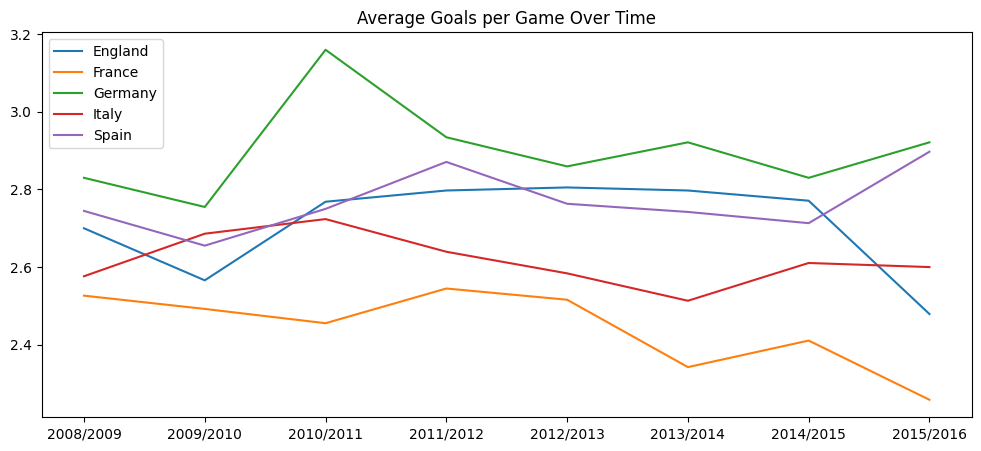

In [33]:
df = pd.DataFrame(index=np.sort(leages_by_season['season'].unique()), columns=leages_by_season['country_name'].unique())

df.loc[:,'Germany'] = list(leages_by_season.loc[leages_by_season['country_name']=='Germany','avg_goals'])
df.loc[:,'Spain']   = list(leages_by_season.loc[leages_by_season['country_name']=='Spain','avg_goals'])
df.loc[:,'France']   = list(leages_by_season.loc[leages_by_season['country_name']=='France','avg_goals'])
df.loc[:,'Italy']   = list(leages_by_season.loc[leages_by_season['country_name']=='Italy','avg_goals'])
df.loc[:,'England']   = list(leages_by_season.loc[leages_by_season['country_name']=='England','avg_goals'])

df.plot(figsize=(12,5),title='Average Goals per Game Over Time')

In [34]:
df

,England,France,Germany,Italy,Spain
2008/2009,2.7,2.526316,2.830065,2.576316,2.744737
2009/2010,2.565789,2.492105,2.754902,2.686016,2.655263
2010/2011,2.768421,2.455263,3.160131,2.723684,2.75
2011/2012,2.797368,2.544737,2.934641,2.639474,2.871053
2012/2013,2.805263,2.515789,2.859477,2.583799,2.763158
2013/2014,2.797368,2.342105,2.921569,2.513158,2.742105
2014/2015,2.771053,2.410526,2.830065,2.610526,2.713158
2015/2016,2.478947,2.257895,2.921569,2.6,2.897368
